In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import multiprocessing
from torch import autograd
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.wgan import *
from fasterai.generators import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
torch.cuda.set_device(0)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True


/home/jason/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jason/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jason/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jason/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
DATA_PATH = Path('data/imagenet/ILSVRC/Data/CLS-LOC')
TRAIN_SOURCE_PATH = DATA_PATH/'train'
proj_id = 'bw2color'

dpath = DATA_PATH/(proj_id + '_5004_D.h5')
gpath = DATA_PATH/(proj_id + '_5004_G.h5')
keep_pct=1.0
bs=8
sz=128
lr=1e-4
lrs = np.array([lr/1000,lr/100,lr])
torch.backends.cudnn.benchmark=True

## Training

In [4]:
netG = EDSRImageModifier().cuda()
#load_model(netG, gpath)
netD = FeatureCritic(sz).cuda()
#load_model(netD, dpath)

/media/jason/Projects/Deep Learning/Deep Learning Projects/Jupyter Experiments/1_BlackWhiteToColor/fasterai/modules.py:32: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  subkernel = init(subkernel)
/media/jason/Projects/Deep Learning/Deep Learning Projects/Jupyter Experiments/1_BlackWhiteToColor/fasterai/modules.py:32: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  subkernel = init(subkernel)
/media/jason/Projects/Deep Learning/Deep Learning Projects/Jupyter Experiments/1_BlackWhiteToColor/fasterai/modules.py:32: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  subkernel = init(subkernel)
/media/jason/Projects/Deep Learning/Deep Learning Projects/Jupyter Experiments/1_BlackWhiteToColor/fasterai/modules.py:32: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  subkernel = init(subkernel)


In [5]:
md = get_matched_image_model_data(image_size=sz, batch_size=bs, root_data_path=DATA_PATH, train_root_path=TRAIN_SOURCE_PATH, proj_id=proj_id, keep_pct=keep_pct)

In [6]:
trainer = WGANTrainer(netD=netD, netG=netG, md=md, bs=bs, sz=sz, dpath=dpath, gpath=gpath)

  1%|          | 1010/158545 [10:59<26:36:26,  1.64it/s]
WDist -2194.9716796875; RScore 1089.746826171875; FScore -1105.2247314453125; GCount: 10; GPenalty: 42.27693176269531; GCost: 1123.017822265625
  1%|▏         | 2020/158545 [21:18<26:27:14,  1.64it/s]
WDist -3912.265380859375; RScore 2202.9326171875; FScore -1709.332763671875; GCount: 20; GPenalty: 280.8670654296875; GCost: 1889.2197265625
  2%|▏         | 2555/158545 [26:45<26:28:50,  1.64it/s]
WDist -4683.609375; RScore 2505.28271484375; FScore -2178.32666015625; GCount: 30; GPenalty: 588.142578125; GCost: 1608.179931640625
  2%|▏         | 2615/158545 [27:23<26:36:11,  1.63it/s]
WDist -4488.0712890625; RScore 2315.34375; FScore -2172.7275390625; GCount: 40; GPenalty: 4532.6298828125; GCost: 2302.422607421875
  2%|▏         | 2675/158545 [28:00<26:30:19,  1.63it/s]
WDist -3402.16015625; RScore 2402.57763671875; FScore -999.5826416015625; GCount: 50; GPenalty: 832.1800537109375; GCost: 1648.71923828125
  2%|▏         | 2735/1585

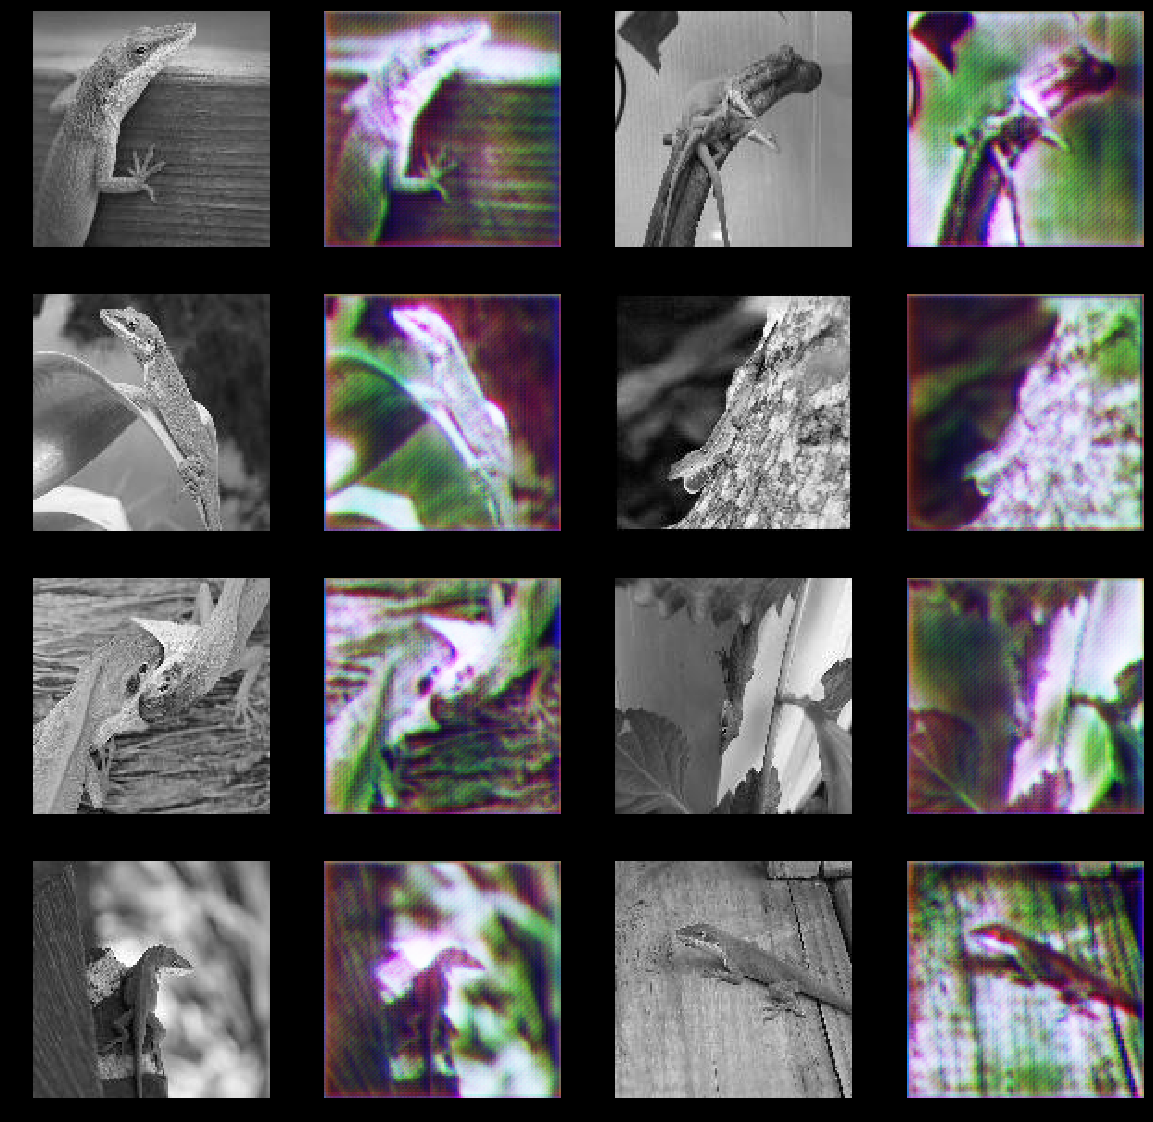

  2%|▏         | 3035/158545 [32:59<26:25:34,  1.63it/s]
WDist -3153.070068359375; RScore 1562.546875; FScore -1590.523193359375; GCount: 110; GPenalty: 1013.9531860351562; GCost: 2584.56298828125
  2%|▏         | 3095/158545 [33:39<26:27:11,  1.63it/s]
WDist -2866.17236328125; RScore 2073.4990234375; FScore -792.67333984375; GCount: 120; GPenalty: 1249.330810546875; GCost: 1391.1474609375
  2%|▏         | 3155/158545 [34:15<26:31:48,  1.63it/s]
WDist -3098.005615234375; RScore 798.2243041992188; FScore -2299.78125; GCount: 130; GPenalty: 773.0681762695312; GCost: 1874.889892578125
  2%|▏         | 3215/158545 [34:53<26:34:01,  1.62it/s]
WDist -2529.606689453125; RScore 385.72607421875; FScore -2143.880615234375; GCount: 140; GPenalty: 898.0986938476562; GCost: 1422.845947265625
  2%|▏         | 3275/158545 [35:30<26:25:00,  1.63it/s]
WDist -2570.129150390625; RScore 261.616455078125; FScore -2308.5126953125; GCount: 150; GPenalty: 305.7016296386719; GCost: 2626.4248046875
  2%|▏      

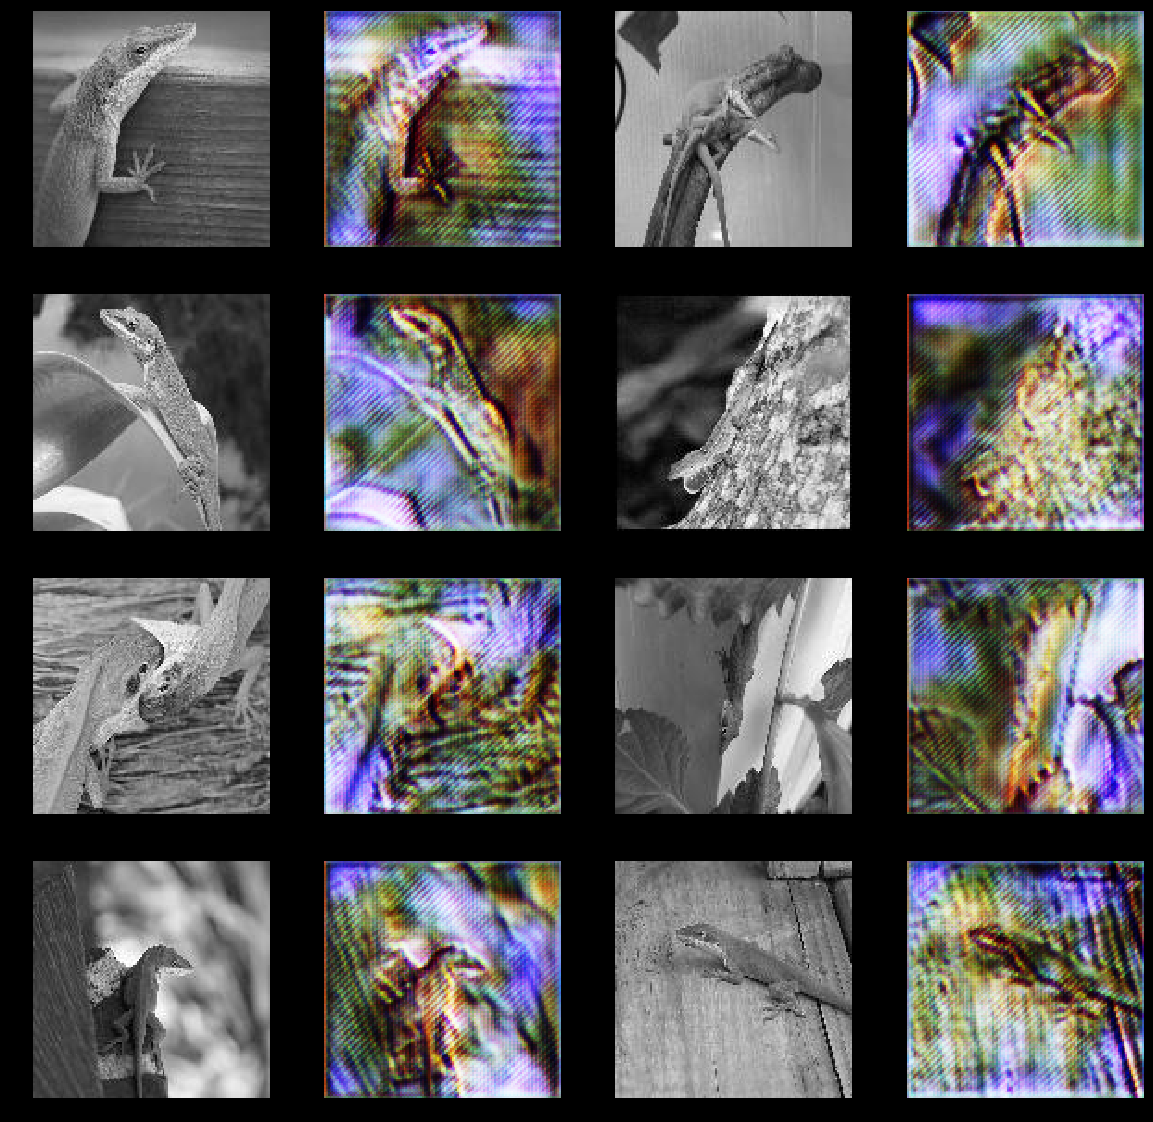

  2%|▏         | 3635/158545 [40:49<26:19:04,  1.64it/s]
WDist -3081.17724609375; RScore 448.09912109375; FScore -2633.078125; GCount: 210; GPenalty: 744.3104248046875; GCost: 2955.58984375
  2%|▏         | 3695/158545 [41:27<26:30:01,  1.62it/s]
WDist -3147.728271484375; RScore 2240.849609375; FScore -906.878662109375; GCount: 220; GPenalty: 791.193359375; GCost: 1355.595947265625
  2%|▏         | 3755/158545 [42:03<26:24:48,  1.63it/s]
WDist -4052.020751953125; RScore 1460.791259765625; FScore -2591.2294921875; GCount: 230; GPenalty: 2267.029296875; GCost: 3091.197265625
  2%|▏         | 3815/158545 [42:40<26:11:07,  1.64it/s]
WDist -2543.85595703125; RScore 1842.456787109375; FScore -701.3992919921875; GCount: 240; GPenalty: 1437.92724609375; GCost: 908.2264404296875
  2%|▏         | 3875/158545 [43:19<26:15:19,  1.64it/s]
WDist -1587.641845703125; RScore 302.8332824707031; FScore -1284.80859375; GCount: 250; GPenalty: 759.4909057617188; GCost: 1476.17431640625
  2%|▏         | 3935

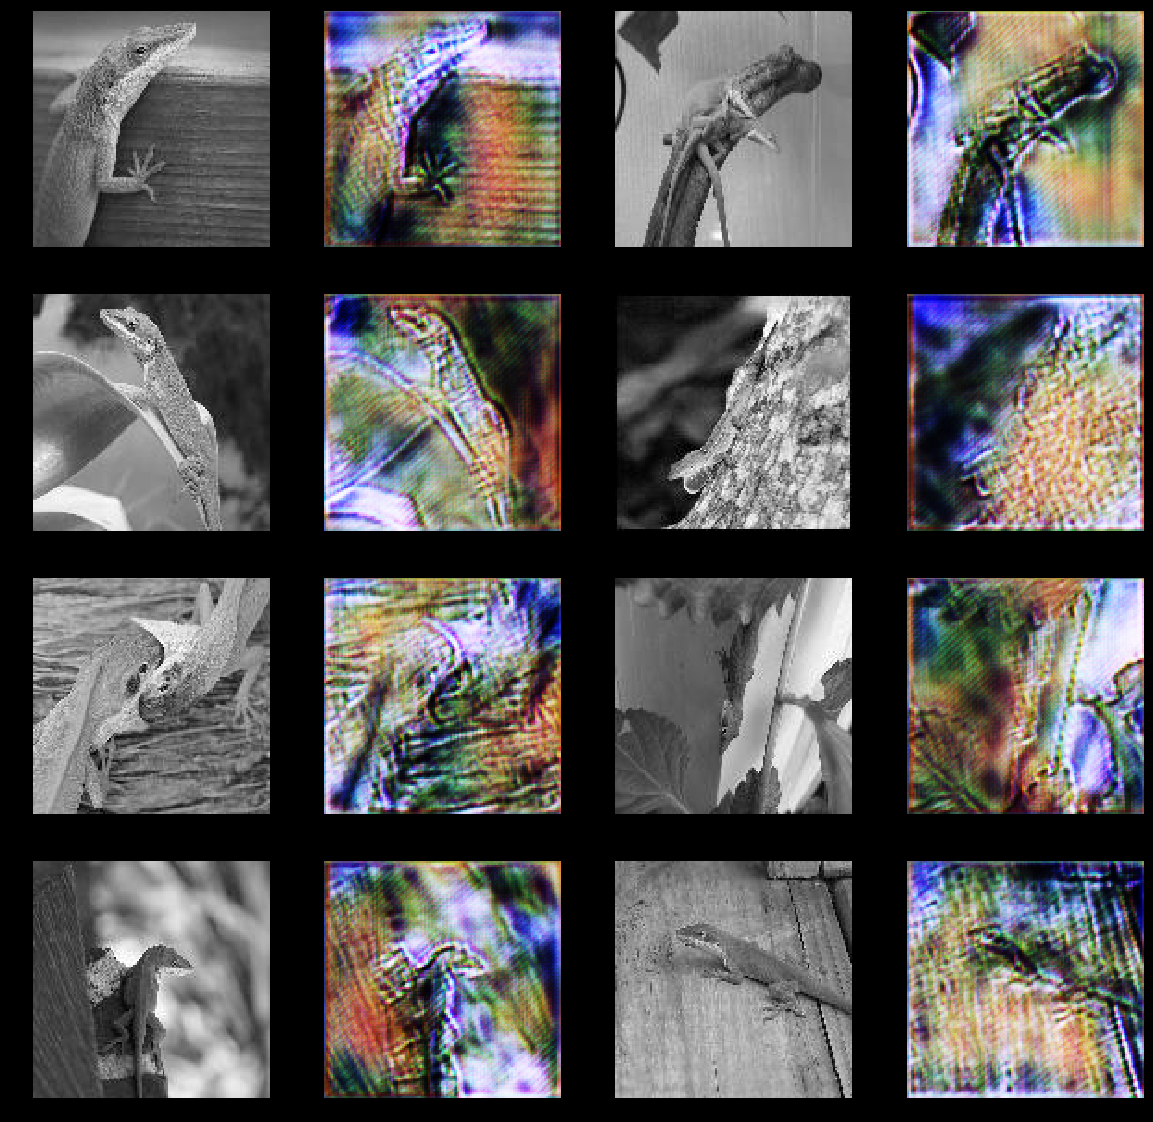

  3%|▎         | 4235/158545 [48:30<26:12:52,  1.64it/s]
WDist -2764.6357421875; RScore 646.8409423828125; FScore -2117.794921875; GCount: 310; GPenalty: 1078.217041015625; GCost: 2435.4248046875
  3%|▎         | 4295/158545 [49:07<26:19:49,  1.63it/s]
WDist -3430.243408203125; RScore 223.31118774414062; FScore -3206.93212890625; GCount: 320; GPenalty: 570.2235107421875; GCost: 2709.1416015625
  3%|▎         | 4355/158545 [49:46<26:18:22,  1.63it/s]
WDist -2793.77880859375; RScore 1144.62890625; FScore -1649.1497802734375; GCount: 330; GPenalty: 914.6292114257812; GCost: 2439.587890625
  3%|▎         | 4415/158545 [50:22<26:09:00,  1.64it/s]
WDist -2186.317138671875; RScore -860.6968383789062; FScore -3047.013916015625; GCount: 340; GPenalty: 760.3974609375; GCost: 2890.8203125
  3%|▎         | 4475/158545 [50:58<26:05:54,  1.64it/s]
WDist -2679.895751953125; RScore 114.86300659179688; FScore -2565.03271484375; GCount: 350; GPenalty: 939.4729614257812; GCost: 2835.670654296875
  3%|▎  

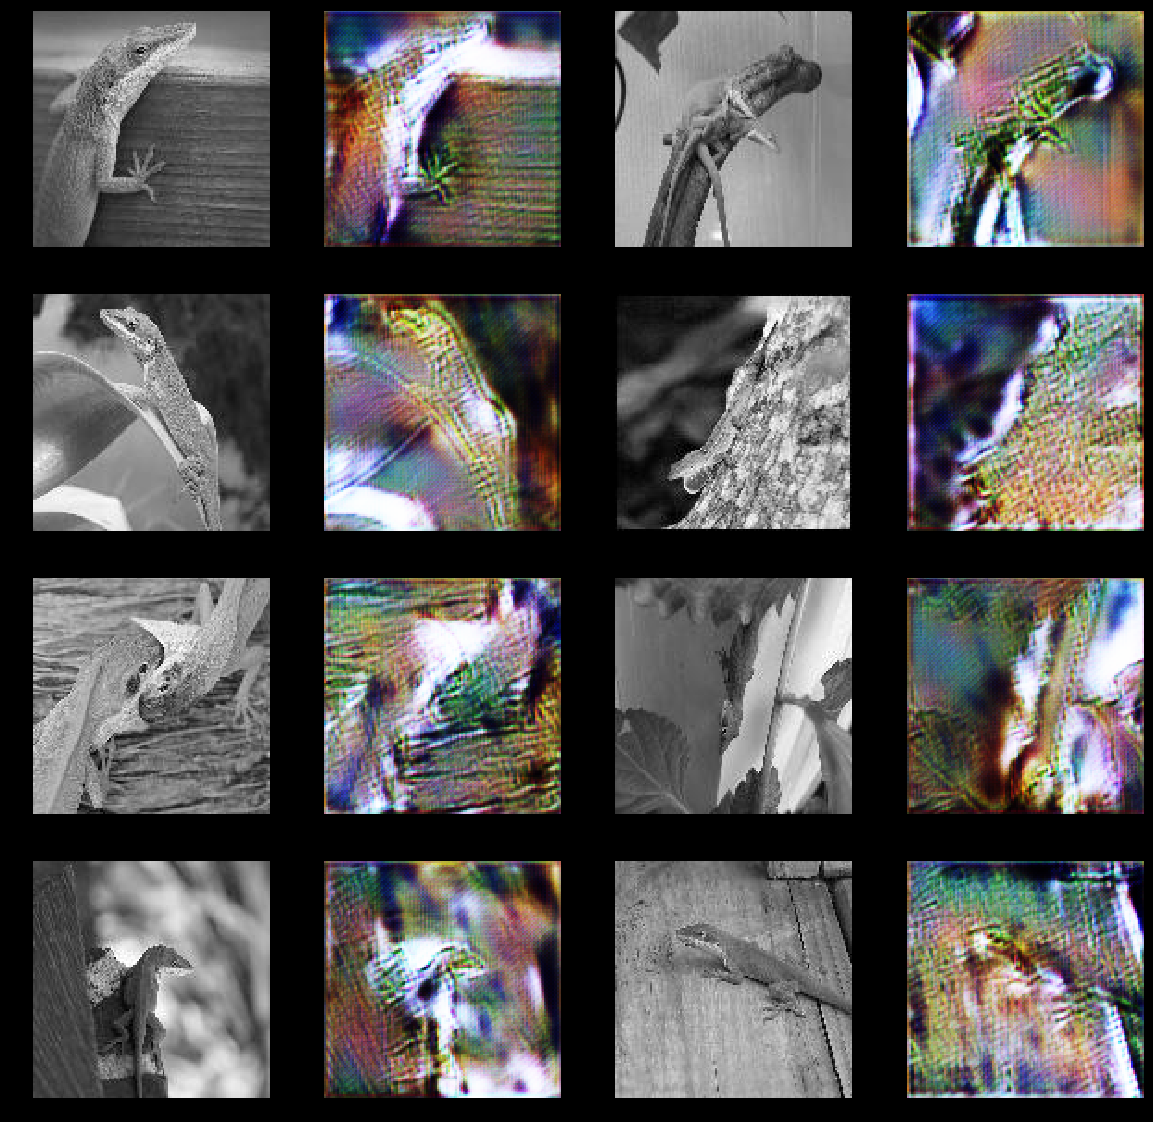

  3%|▎         | 4835/158545 [56:07<26:02:55,  1.64it/s]
WDist -2386.123779296875; RScore 551.72216796875; FScore -1834.401611328125; GCount: 410; GPenalty: 773.4915771484375; GCost: 1933.3271484375
  3%|▎         | 4895/158545 [56:43<26:04:30,  1.64it/s]
WDist -3385.0380859375; RScore 1406.005126953125; FScore -1979.0330810546875; GCount: 420; GPenalty: 1529.252685546875; GCost: 2690.9599609375
  3%|▎         | 4955/158545 [57:20<26:06:19,  1.63it/s]
WDist -3007.84619140625; RScore 1208.8006591796875; FScore -1799.045654296875; GCount: 430; GPenalty: 925.535400390625; GCost: 1601.82080078125
  3%|▎         | 5015/158545 [57:59<25:59:52,  1.64it/s]
WDist -2795.3974609375; RScore 395.1893310546875; FScore -2400.2080078125; GCount: 440; GPenalty: 675.2916259765625; GCost: 1947.4755859375
  3%|▎         | 5075/158545 [58:35<26:03:37,  1.64it/s]
WDist -2333.922607421875; RScore -35.374996185302734; FScore -2369.297607421875; GCount: 450; GPenalty: 1093.25439453125; GCost: 1345.392822265625

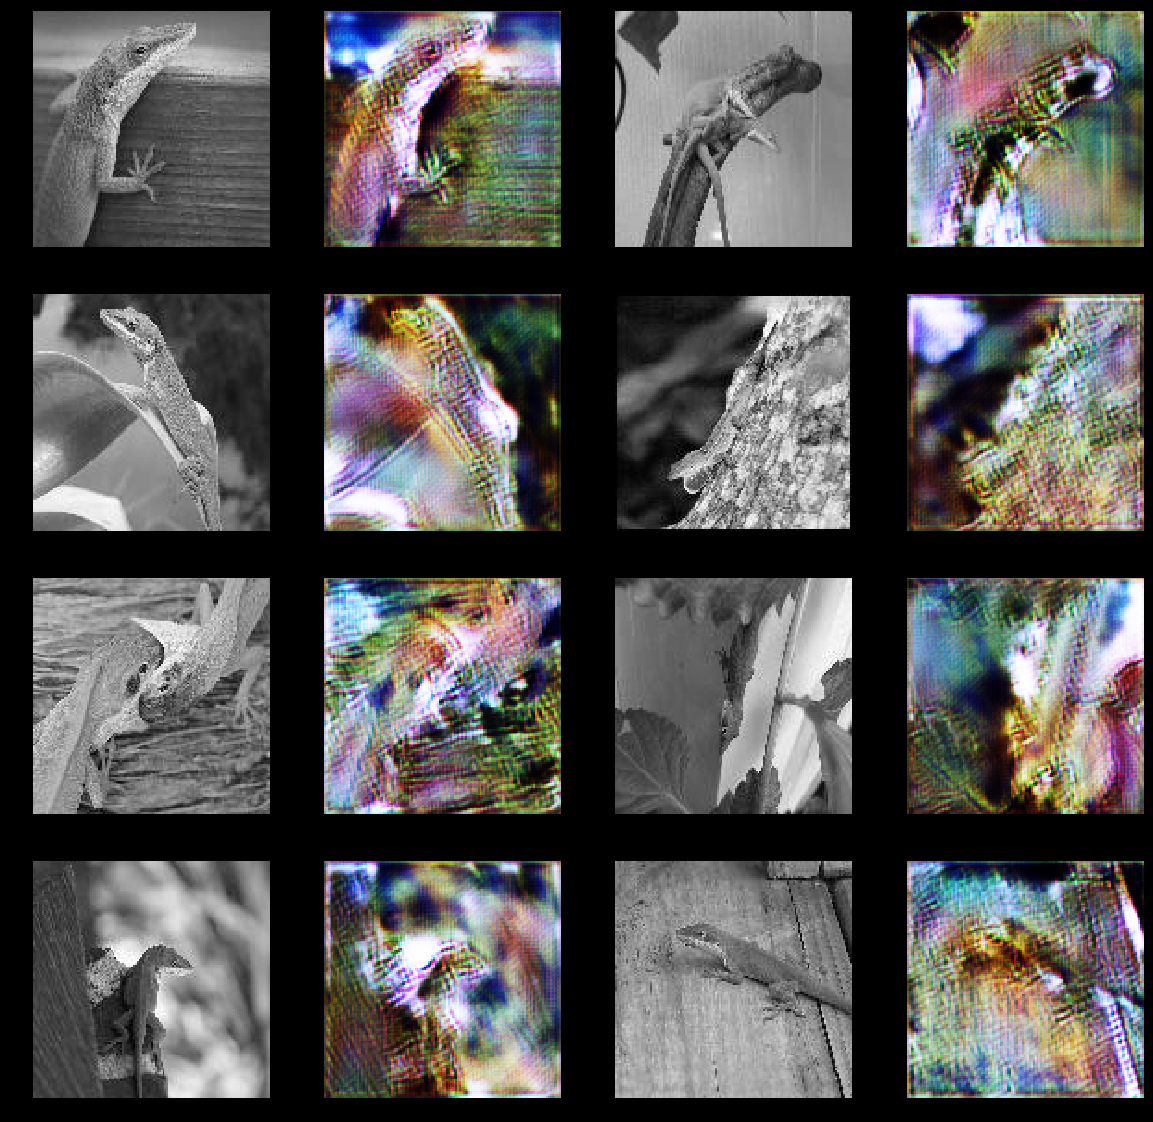

  3%|▎         | 5530/158545 [1:04:49<26:06:51,  1.63it/s]
WDist -1358.10400390625; RScore -1614.677490234375; FScore -2972.781494140625; GCount: 510; GPenalty: 378.6204833984375; GCost: 3137.21875
  4%|▎         | 5590/158545 [1:05:25<26:00:27,  1.63it/s]
WDist -1612.4290771484375; RScore -1057.5528564453125; FScore -2669.98193359375; GCount: 520; GPenalty: 414.4140625; GCost: 2202.6865234375
  4%|▎         | 5650/158545 [1:06:03<26:02:05,  1.63it/s]
WDist -3500.3837890625; RScore 277.0418701171875; FScore -3223.341796875; GCount: 530; GPenalty: 510.018310546875; GCost: 3238.61767578125
  4%|▎         | 5710/158545 [1:06:40<25:54:10,  1.64it/s]
WDist -1788.681640625; RScore 1505.875244140625; FScore -282.80645751953125; GCount: 540; GPenalty: 647.135986328125; GCost: 1436.375732421875
  4%|▎         | 5770/158545 [1:07:18<26:50:42,  1.58it/s]
WDist -2512.573486328125; RScore 423.85858154296875; FScore -2088.71484375; GCount: 550; GPenalty: 797.1932373046875; GCost: 2244.2587890625
  4

In [ ]:
trainer.train(lrs_critic=lrs, lrs_gen=lrs, clr_critic=(5,8), clr_gen=(5,8), cycle_len=1, epochs=1, first=True)